### Install and Import Dependencies

In [ ]:
#!pip install xgboost==1.0.1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import asarray
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
# Importing the libraries
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler

# 1.Head classification


In [3]:
# Importing the dataset
df1 = pd.read_csv('/content/drive/MyDrive/paper 3 siham/data/data1_head.csv', sep = ',')
df1 = df1.iloc[: , 1:]
df1 = df1.sample(frac = 1)
df1.head(3)

,yaw,pitch,roll,label
176,-22.529987,-21.675846,8.424246,0.0
223,-34.163754,-21.386700,-2.335941,0.0
521,-7.955177,-24.556461,3.283003,0.0


In [4]:
df1.describe()

,yaw,pitch,roll,label
count,734.000000,734.000000,734.000000,734.000000
mean,-2.426969,-18.704180,1.361481,0.249319
std,12.882910,6.908743,5.178785,0.432914
min,-51.382526,-43.008926,-23.357460,0.000000
25%,-10.333507,-23.022559,-1.310989,0.000000
50%,-1.220596,-17.690753,1.580299,0.000000
75%,6.418335,-14.073036,4.140187,0.000000
max,37.080246,15.091099,28.297529,1.000000


In [5]:
df1['label']

176    0.0
223    0.0
521    0.0
343    0.0
456    0.0
      ... 
243    0.0
215    0.0
17     0.0
391    0.0
390    0.0
Name: label, Length: 734, dtype: float64

<Axes: >

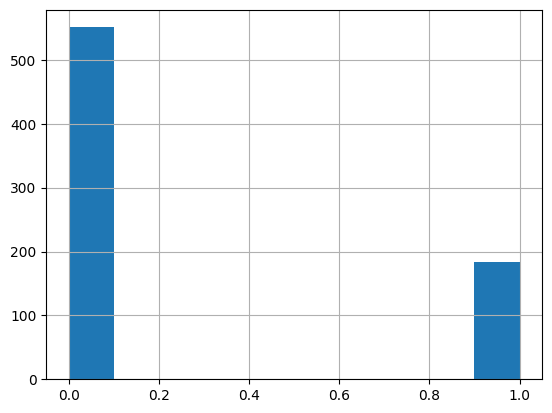

In [6]:
# Histograms
df1["label"].hist()

In [7]:
X1 = df1.iloc[:, :3].values
y1 = df1.iloc[:, 3:4].values

In [8]:
X1

array([[-22.52998734, -21.6758461 ,   8.42424583],
       [-34.16375351, -21.38669968,  -2.33594084],
       [ -7.95517683, -24.55646133,   3.28300261],
       ...,
       [  4.7080431 ,  -2.47453022,  -0.14932434],
       [ -4.99092102, -15.35670567,   3.43362331],
       [  4.35083866, -17.40646553,  -1.31762242]])

In [9]:
# Min-Max scaling for features
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1)

# Display the scaled features
print("Scaled Features:")
print(pd.DataFrame(X1, columns=df1.columns[:3]))

Scaled Features:
          yaw     pitch      roll
0    0.326155  0.367179  0.615269
1    0.194644  0.372155  0.406960
2    0.490911  0.317598  0.515738
3    0.733774  0.238044  0.537094
4    0.501119  0.531898  0.575709
..        ...       ...       ...
729  0.619722  0.340373  0.315027
730  0.416739  0.659788  0.488363
731  0.634058  0.697666  0.449291
732  0.524420  0.475942  0.518654
733  0.630021  0.440662  0.426674

[734 rows x 3 columns]


In [10]:
y1

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

In [11]:

import time
# Splitting the dataset into the Training set and Test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(
	X1, y1, test_size=0.3, random_state=0)

# Fitting XGBoost to the training data
t1=time.time()
my_model1 = xgb.XGBClassifier()
my_model1.fit(X_train1, y_train1)
t2= time.time()
temps_execution = t2 - t1
print(f"Le temps d'exécution est de {temps_execution} secondes.")

# Predicting the Test set results
t3=time.time()
y_pred1 = my_model1.predict(X_test1)
t4= time.time()
temps_execution = t4 - t3
print(f"Le temps d'exécution est de {temps_execution} secondes.")
# Making the Confusion Matrix
cm1= confusion_matrix(y_test1, y_pred1)


Le temps d'exécution est de 0.11617183685302734 secondes.
Le temps d'exécution est de 0.0027091503143310547 secondes.


In [12]:
cm1

array([[147,  21],
       [ 36,  17]])

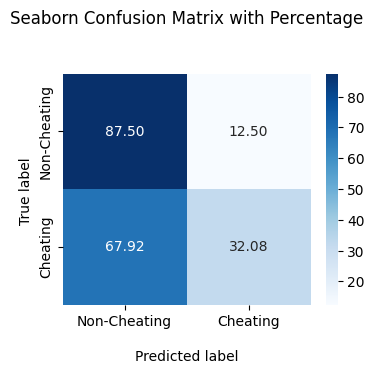

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have y_test1 and y_pred1 defined
f,ax = plt.subplots(figsize=(4,3))
# Generate the confusion matrix
cm1 = confusion_matrix(y_test1, y_pred1)

# Calculate the percentages
cm1_percent = cm1 / cm1.sum(axis=1)[:, np.newaxis] * 100

# Create the heatmap
ax = sns.heatmap(cm1_percent, annot=True, cmap=plt.cm.Blues, fmt='.2f')

# Set the title and labels
ax.set_title('Seaborn Confusion Matrix with Percentage\n\n')
ax.set_xlabel('\nPredicted label')
ax.set_ylabel('True label ')

# Set tick labels
ax.xaxis.set_ticklabels(['Non-Cheating', 'Cheating'])
ax.yaxis.set_ticklabels(['Non-Cheating', 'Cheating'])

# Display the visualization of the Confusion Matrix with percentage
plt.show()


In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test1, y_pred1))

0.7420814479638009


In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train1, my_model1.predict(X_train1)))

1.0


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [17]:
print("precision=",precision_score(y_test1, y_pred1),",","recall=",recall_score(y_test1, y_pred1),",","f1_score=",f1_score(y_test1, y_pred1))

precision= 0.4473684210526316 , recall= 0.32075471698113206 , f1_score= 0.37362637362637363


Specificity in Python

In [18]:
true_negatives1 = cm1[0, 0]
false_positives1 = cm1[0, 1]
print('specificity=',true_negatives1 / (true_negatives1 + false_positives1))

specificity= 0.875


# 2.Eyes Classification

In [19]:
# Importing the dataset
df2 = pd.read_csv('/content/drive/MyDrive/paper 3 siham/data/data1_eyes.csv', sep = ',')
print(df2)

     Unnamed: 0  a_leftPupilPoint  b_leftPupilPoint  a_rightPupilPoint  \
0             0               618               421                729   
1             1               514               346                621   
2             2               506               370                600   
3             3               645               434                755   
4             4               473               364                581   
..          ...               ...               ...                ...   
512         354               703               456                796   
513         355               656               462                740   
514         356               566               407                649   
515         357               613               426                687   
516         358               568               452                670   

     b_rightPupilPoint  label  
0                  428      1  
1                  355      1  
2              

In [20]:
df2 = df2.iloc[: , 1:]
df2 = df2.sample(frac = 1)
print(df2)

     a_leftPupilPoint  b_leftPupilPoint  a_rightPupilPoint  b_rightPupilPoint  \
219               444               388                530                395   
66                471               345                571                339   
147               862                61                900                 54   
130               723               458                816                454   
126               499               414                581                409   
..                ...               ...                ...                ...   
463               574               386                692                389   
233               555               278                688                287   
296               451               412                589                411   
457               574               471                651                472   
253               533               319                634                324   

     label  
219      0  
6

In [21]:
X2 = df2.iloc[:, :4].values
y2 = df2.iloc[:, 4:].values

In [22]:
X2

array([[444, 388, 530, 395],
       [471, 345, 571, 339],
       [862,  61, 900,  54],
       ...,
       [451, 412, 589, 411],
       [574, 471, 651, 472],
       [533, 319, 634, 324]])

In [27]:
# Min-Max scaling for features
scaler = MinMaxScaler()
X2 = scaler.fit_transform(X2)

# Display the scaled features
print("Scaled Features:")
#print(pd.DataFrame(X2_scaled, columns=df2.columns[:3]))
print(pd.DataFrame(X2, columns=df2.columns[:4]))

Scaled Features:
     a_leftPupilPoint  b_leftPupilPoint  a_rightPupilPoint  b_rightPupilPoint
0            0.387097          0.719608           0.396411           0.725338
1            0.426686          0.635294           0.463295           0.617021
2            1.000000          0.078431           1.000000           0.065764
3            0.796188          0.856863           0.862969           0.839458
4            0.467742          0.770588           0.479608           0.752418
..                ...               ...                ...                ...
512          0.577713          0.715686           0.660685           0.713733
513          0.549853          0.503922           0.654160           0.516441
514          0.397361          0.766667           0.492659           0.756286
515          0.577713          0.882353           0.593801           0.874275
516          0.517595          0.584314           0.566069           0.588008

[517 rows x 4 columns]


In [28]:
y2

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [29]:
# Splitting the dataset into the Training set and Test set
X_train2, X_test2, y_train2, y_test2 = train_test_split(
	X2, y2, test_size=0.3, random_state=0)

# Fitting XGBoost to the training data
t1= time.time()
my_model2 = xgb.XGBClassifier()
my_model2.fit(X_train2, y_train2)
t2= time.time()
temps_execution = t2 - t1
print(f"Le temps d'exécution est de {temps_execution} secondes.")

# Predicting the Test set results
t3=time.time()
y_pred2 = my_model2.predict(X_test2)
t4= time.time()
temps_execution = t4 - t3
print(f"Le temps d'exécution est de {temps_execution} secondes.")
# Making the Confusion Matrix
cm2 = confusion_matrix(y_test2, y_pred2)


Le temps d'exécution est de 0.04452371597290039 secondes.
Le temps d'exécution est de 0.0013926029205322266 secondes.


In [30]:
cm2

array([[89, 14],
       [34, 19]])

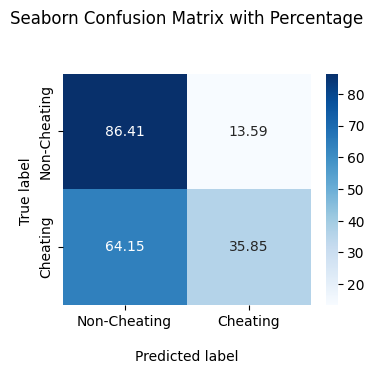

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have y_test1 and y_pred1 defined
f,ax = plt.subplots(figsize=(4,3))
# Generate the confusion matrix
cm1 = confusion_matrix(y_test2, y_pred2)

# Calculate the percentages
cm1_percent = cm1 / cm1.sum(axis=1)[:, np.newaxis] * 100

# Create the heatmap
ax = sns.heatmap(cm1_percent, annot=True, cmap=plt.cm.Blues, fmt='.2f')

# Set the title and labels
ax.set_title('Seaborn Confusion Matrix with Percentage\n\n')
ax.set_xlabel('\nPredicted label')
ax.set_ylabel('True label ')

# Set tick labels
ax.xaxis.set_ticklabels(['Non-Cheating', 'Cheating'])
ax.yaxis.set_ticklabels(['Non-Cheating', 'Cheating'])

# Display the visualization of the Confusion Matrix with percentage
plt.show()

In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test2, y_pred2))

0.6923076923076923


In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train2, my_model2.predict(X_train2)))

0.997229916897507


In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [35]:
print("precision=",precision_score(y_test2, y_pred2),",","recall=",recall_score(y_test2, y_pred2),",","f1_score=",f1_score(y_test2, y_pred2))

precision= 0.5757575757575758 , recall= 0.3584905660377358 , f1_score= 0.441860465116279


Specificity in Python

In [36]:
true_negatives2 = cm2[0, 0]
false_positives2 = cm2[0, 1]
print('specificity=',true_negatives2 / (true_negatives2 + false_positives2))

specificity= 0.8640776699029126


# 3.Weighted average accuracy

In [37]:
acc1=accuracy_score(y_test1, y_pred1)
w1=my_model1.feature_importances_
wa1=np.mean(w1)
acc2=accuracy_score(y_test2, y_pred2)
w2=my_model2.feature_importances_
wa2=np.mean(w2)

In [38]:
avrg=((acc1*wa1)+(acc2*wa2))/(wa1+wa2)

In [39]:
avrg

0.7207498019372851